In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

Using this Kaggle data create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [6]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.shape

(34857, 21)

In [5]:
list(df)

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [6]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

Price             7610
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [7]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

                  Rooms     Price  Distance  Postcode  Bedroom2  Bathroom  \
Rooms          1.000000  0.465238  0.271511  0.085890  0.946755  0.611826   
Price          0.465238  1.000000 -0.211384  0.044950  0.430275  0.429878   
Distance       0.271511 -0.211384  1.000000  0.481566  0.269524  0.126201   
Postcode       0.085890  0.044950  0.481566  1.000000  0.089292  0.120080   
Bedroom2       0.946755  0.430275  0.269524  0.089292  1.000000  0.614892   
Bathroom       0.611826  0.429878  0.126201  0.120080  0.614892  1.000000   
Car            0.393878  0.201803  0.241835  0.067886  0.388491  0.307518   
Landsize       0.037402  0.032748  0.060862  0.040664  0.037019  0.036333   
BuildingArea   0.156229  0.100754  0.076301  0.042437  0.154157  0.147558   
YearBuilt     -0.012749 -0.333306  0.323059  0.089805 -0.002022  0.167955   
Lattitude      0.004872 -0.215607 -0.100417 -0.231027  0.003447 -0.059183   
Longtitude     0.103235  0.197874  0.200946  0.362895  0.106164  0.106531   

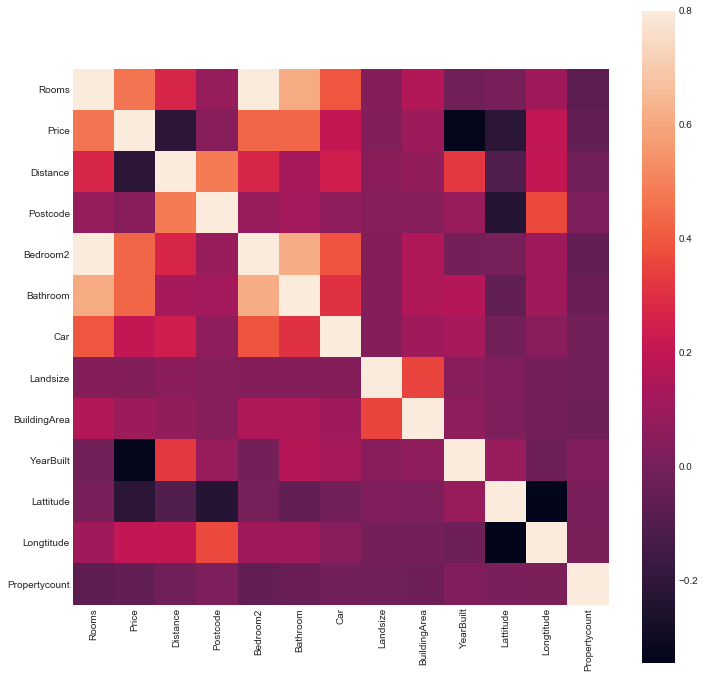

In [8]:
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12,12))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [8]:
df.dropna(subset=['Distance'], inplace=True)

In [9]:
df.dropna(subset=['Postcode'], inplace=True)

In [10]:
df.dropna(subset=['Propertycount'], inplace=True)

In [11]:
df.dropna(subset=['Price'], inplace=True)

In [12]:
df.dropna(subset=['Bedroom2'], inplace=True)

In [13]:
df.dropna(subset=['Bathroom'], inplace=True)

In [14]:
df.dropna(subset=['Car'], inplace=True)

In [15]:
df.dropna(subset=['Lattitude'], inplace=True)

In [16]:
df.dropna(subset=['Longtitude'], inplace=True)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
df_scaled = scaler.fit_transform(df[['Distance', 'Postcode', 'Propertycount', 'Bedroom2', 'Bathroom', 'Car', 'Rooms',
       'Lattitude', 'Longtitude']])

In [32]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=14)
X = df[['Distance', 'Postcode', 'Propertycount', 'Bedroom2', 'Bathroom', 'Car', 'Rooms',
       'Lattitude', 'Longtitude']]
Y = df.Price
knn.fit(df_scaled, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=14, p=2,
          weights='uniform')

In [19]:
X.isnull().sum()

Distance         0
Postcode         0
Propertycount    0
Bedroom2         0
Bathroom         0
Car              0
Rooms            0
Lattitude        0
Longtitude       0
dtype: int64

In [20]:
Y.isnull().sum()

0

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cross = cross_val_score(knn, df_scaled, Y, cv=10)

In [35]:
cross

array([0.66273013, 0.64128783, 0.54895965, 0.6112193 , 0.66706348,
       0.64337015, 0.6972933 , 0.65557201, 0.707188  , 0.7140236 ])

In [36]:
cross.mean()

0.6548707445000213

In [ ]:
# Regression is R Squared value. This explains 65.4% of housing prices.

In [27]:
# about the same results scaled vs not scaled 

In [1]:
# Tried using fillna in another notebook and got about the same results.